Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os 
from scipy.cluster.hierarchy import dendrogram, linkage
plt.rcParams['figure.figsize'] = (20,10)

Load Data Set 

In [26]:
os.chdir('F:\Data science batch 74\Batch 74 Day 18\Batch 74 Day 18')
os.getcwd()

'F:\\Data science batch 74\\Batch 74 Day 18\\Batch 74 Day 18'

In [49]:
df= pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


MANUAL EDA

In [50]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [51]:
display(df.shape)

(200, 5)

In [52]:
display(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [71]:
len(df)

200

Create X Variable 

In [72]:
x=df.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

K-Means: Inertia , Line Graph with WCSS (Sum of distances) 

[183653.3289473684,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37271.8862365895,
 30259.65720728547,
 25006.78551455169,
 21818.11458845218,
 19676.612585602805]

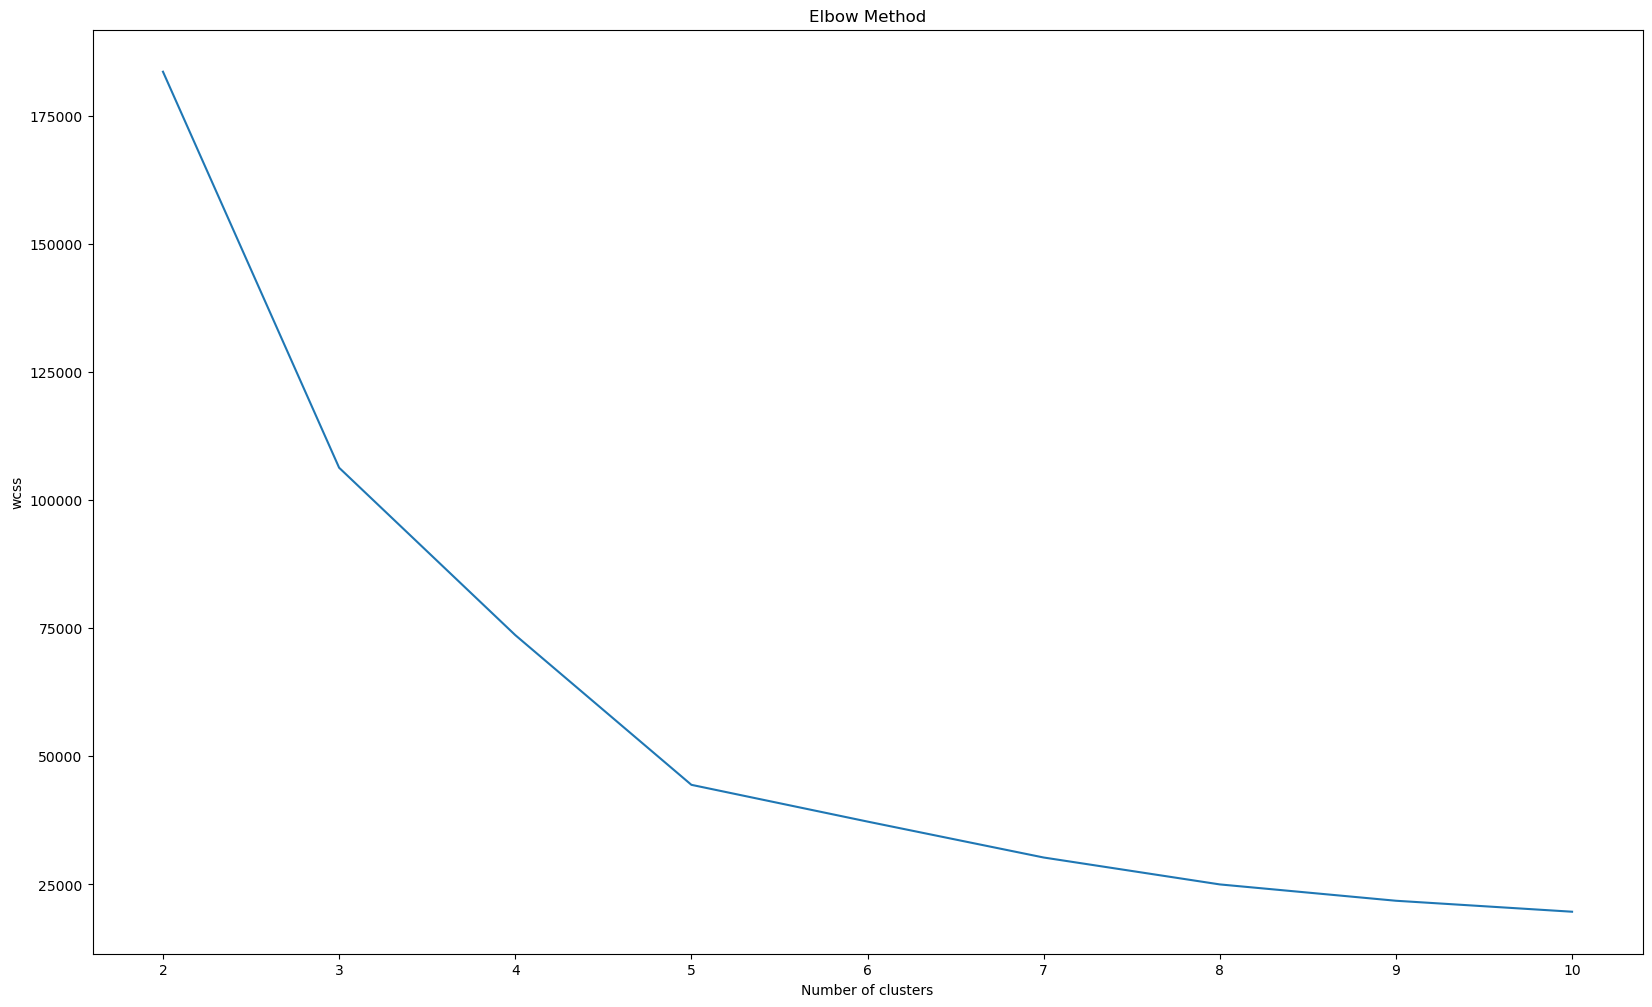

In [55]:
from sklearn.cluster import KMeans 
wcss=[]
for i  in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
display(wcss)
plt.figure(figsize=(20,12))
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')
plt.show()


Model and predictions 

In [56]:
kmeans = KMeans(n_clusters =5 , init='k-means++')
kmeans = kmeans.fit(x)
ykmeans = kmeans.labels_ A
display(ymeans)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Create Clusters (n_clusters =5)

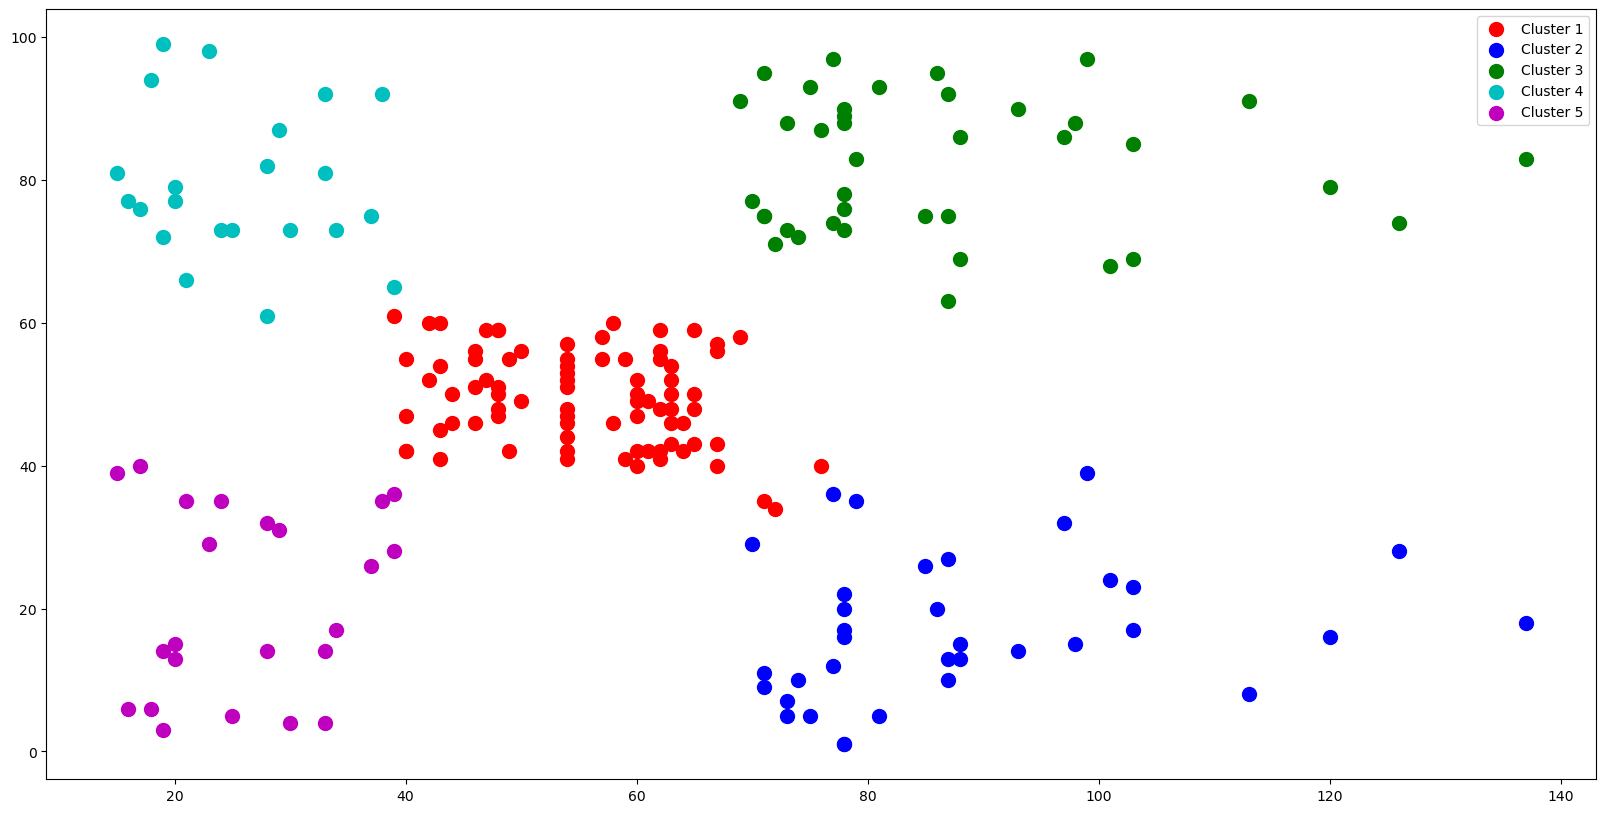

In [57]:
plt.figure(figsize=(20, 10))
plt.scatter (x[ykmeans == 0,0],x[ykmeans == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[ykmeans == 1,0],x[ykmeans == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.scatter (x[ykmeans == 2,0],x[ykmeans == 2,1] ,s = 100, c='g', label = 'Cluster 3')
plt.scatter (x[ykmeans == 3,0],x[ykmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.scatter (x[ykmeans == 4,0],x[ykmeans == 4,1] ,s = 100, c='m', label = 'Cluster 5')
plt.legend()
plt.show()


Create Clusters (n_clusters =8)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 6, 1, 6, 3, 6, 3, 6,
       1, 6, 3, 6, 3, 6, 3, 6, 3, 6, 1, 6, 3, 6, 1, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 6, 1, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0])

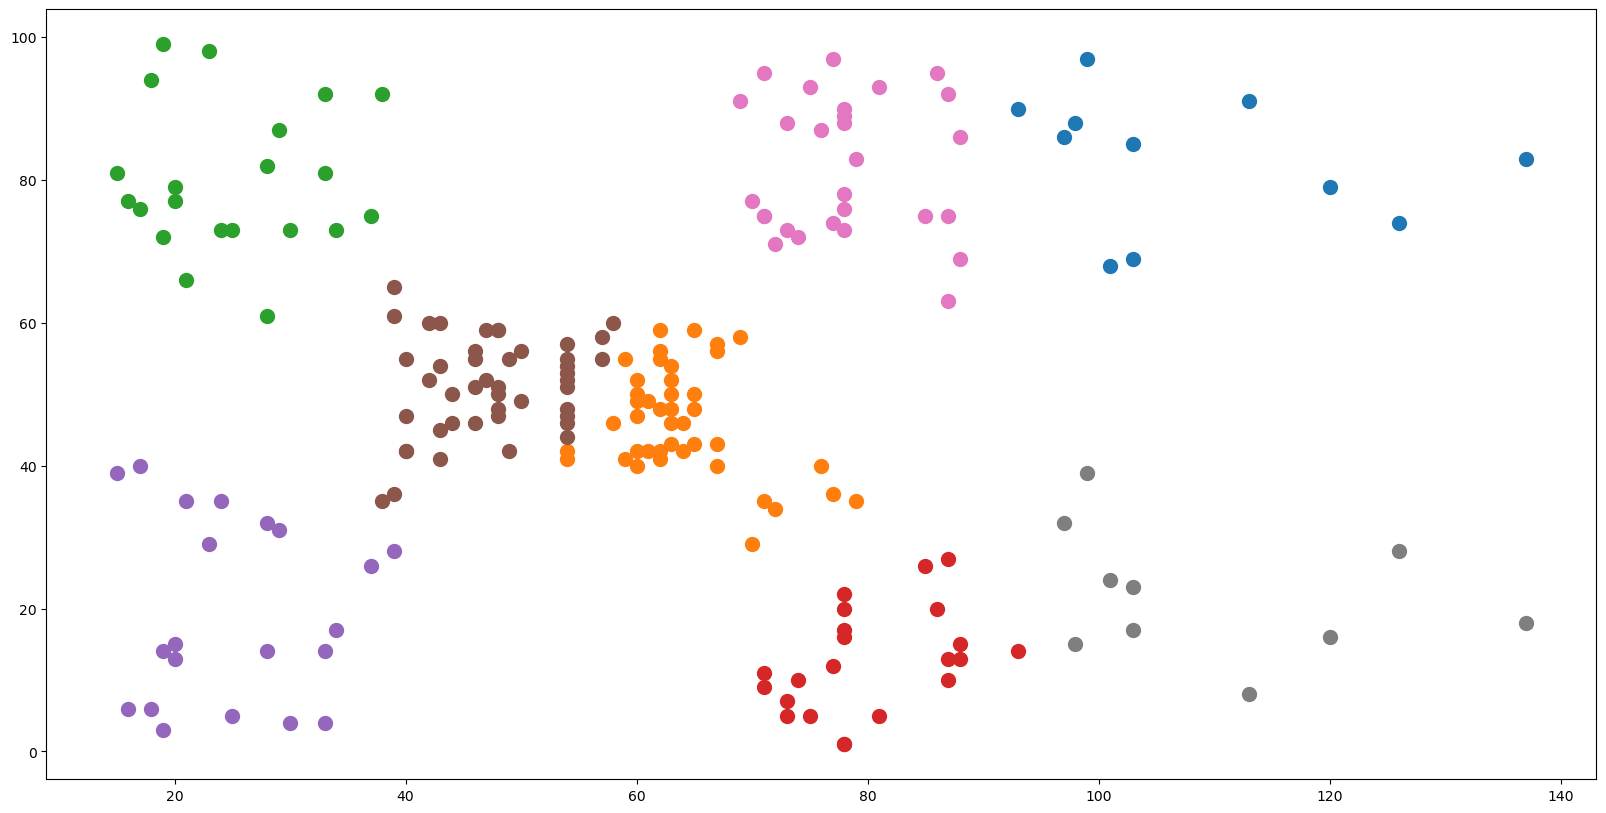

In [58]:
kmeans =  KMeans (n_clusters =  8 , init = 'k-means++')
kmeans = kmeans.fit(x)
ykmeans = kmeans.labels_
display (ykmeans)
plt.figure(figsize=(20, 10))
plt.scatter (x[ykmeans == 0,0],x[ykmeans == 0,1] ,s = 100)
plt.scatter (x[ykmeans == 1,0],x[ykmeans == 1,1] ,s = 100)
plt.scatter (x[ykmeans == 2,0],x[ykmeans == 2,1] ,s = 100)
plt.scatter (x[ykmeans == 3,0],x[ykmeans == 3,1] ,s = 100)
plt.scatter (x[ykmeans == 4,0],x[ykmeans == 4,1] ,s = 100)
plt.scatter (x[ykmeans == 5,0],x[ykmeans == 5,1] ,s = 100)
plt.scatter (x[ykmeans == 6,0],x[ykmeans == 6,1] ,s = 100)
plt.scatter (x[ykmeans == 7,0],x[ykmeans == 7,1] ,s = 100)
plt.show()


Create Clusters (n_clusters =3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

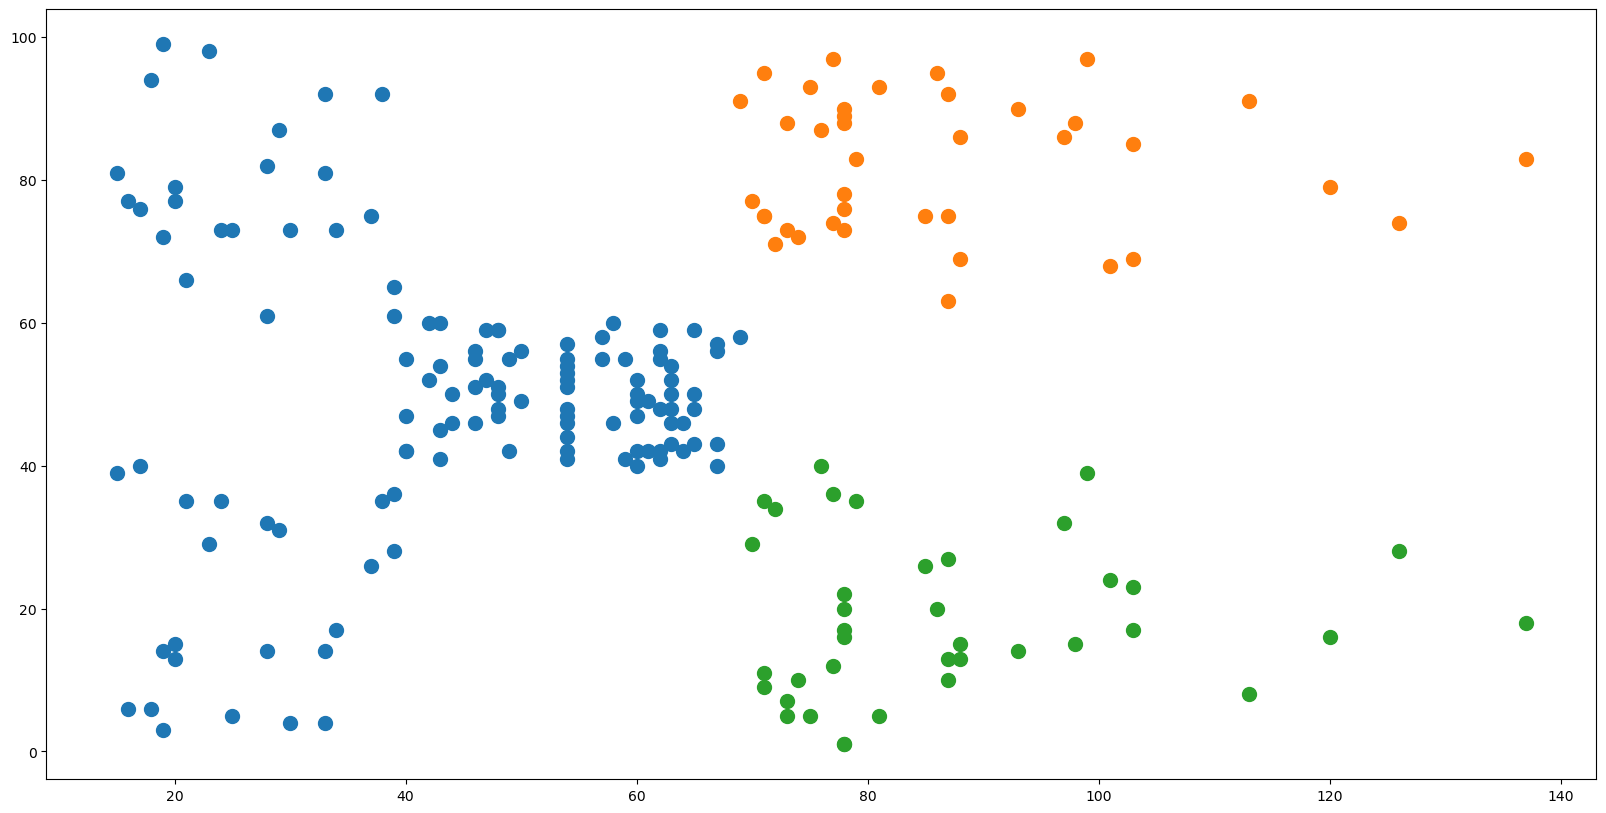

In [59]:
kmeans =  KMeans (n_clusters =  3, init = 'k-means++')
kmeans = kmeans.fit(x)
ykmeans =  kmeans.labels_
display (ykmeans)
plt.figure(figsize=(20, 10))
plt.scatter (x[ykmeans == 0,0],x[ykmeans == 0,1] ,s = 100)
plt.scatter (x[ykmeans == 1,0],x[ykmeans == 1,1] ,s = 100)
plt.scatter (x[ykmeans == 2,0],x[ykmeans == 2,1] ,s = 100)
plt.show()


Dendrogram with Ward  

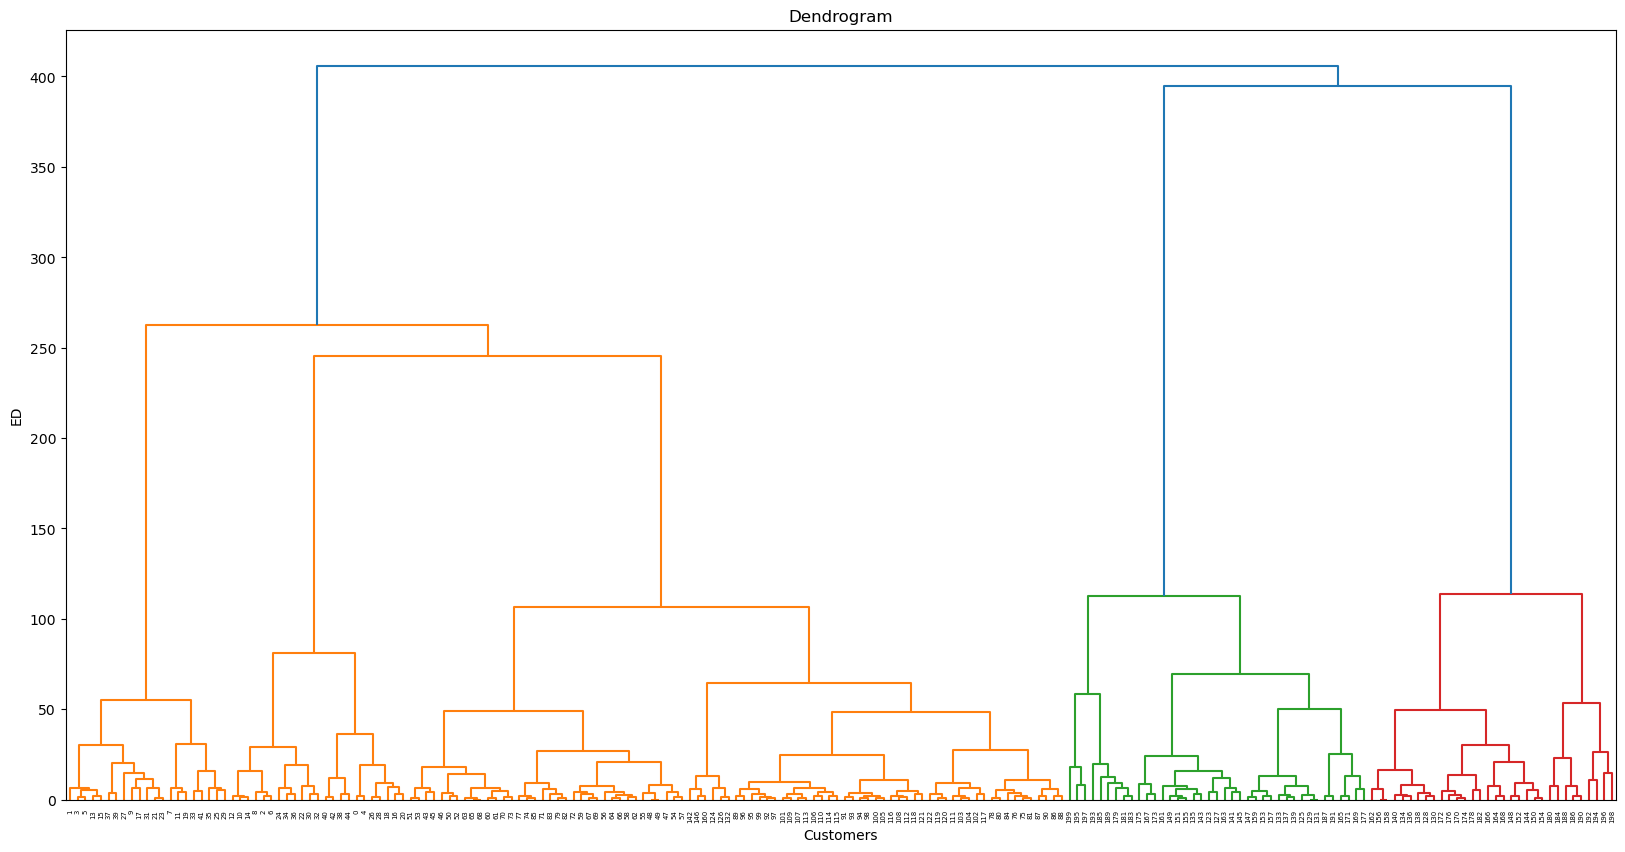

In [60]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()

The model with 2 Clusters 

In [61]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
display (y_hc)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Number of records in each Cluster 

In [62]:
display (pd.DataFrame(y_hc).value_counts())

1    129
0     71
dtype: int64

Plot Graph 

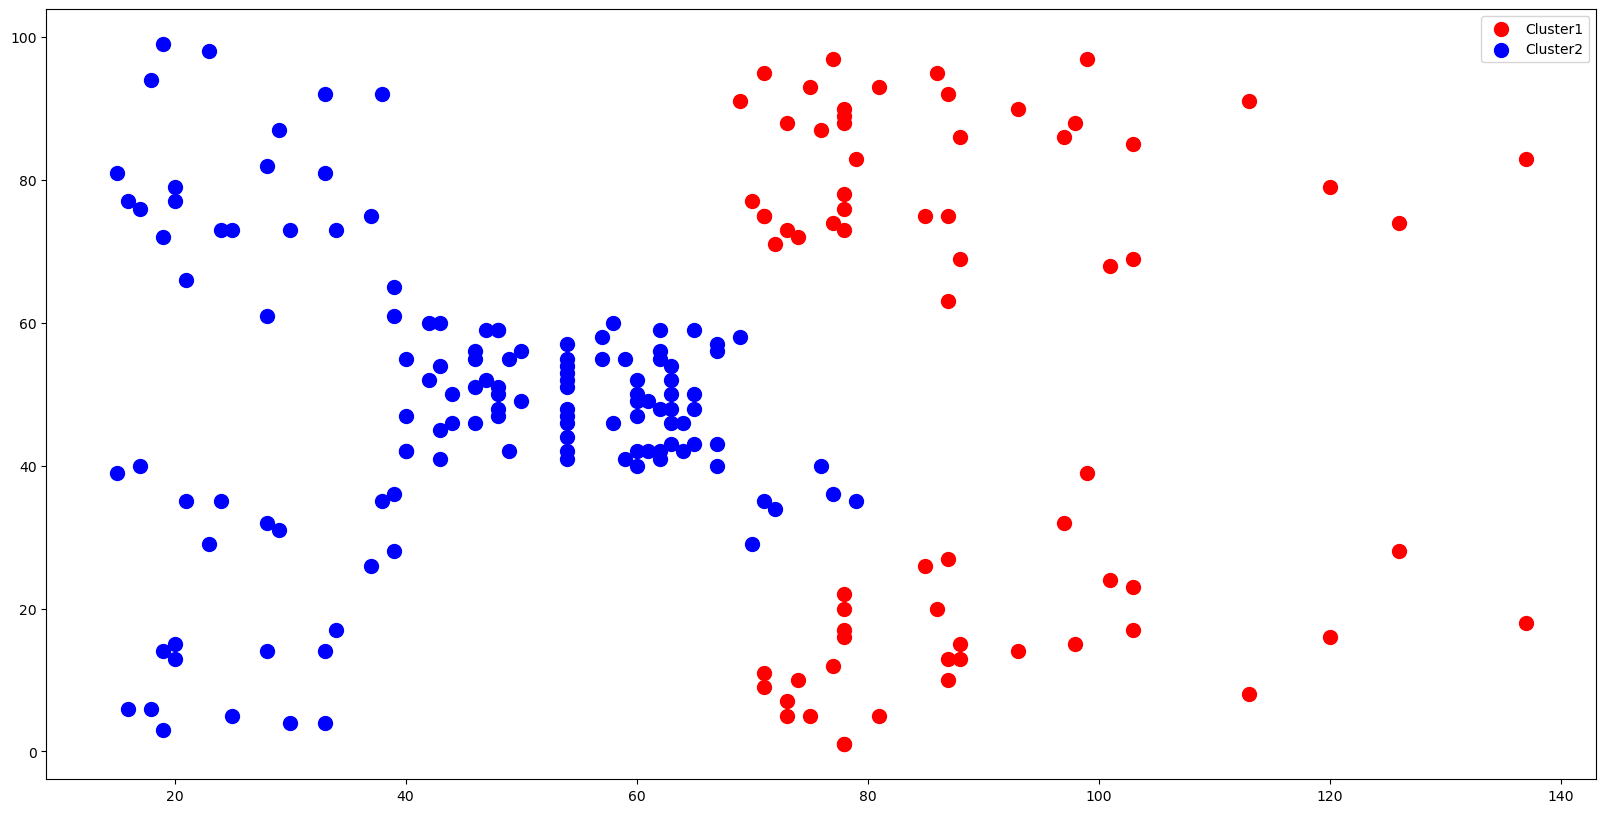

In [63]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.legend()
plt.show()

 Model with 3 Clusters 

0    129
2     39
1     32
dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

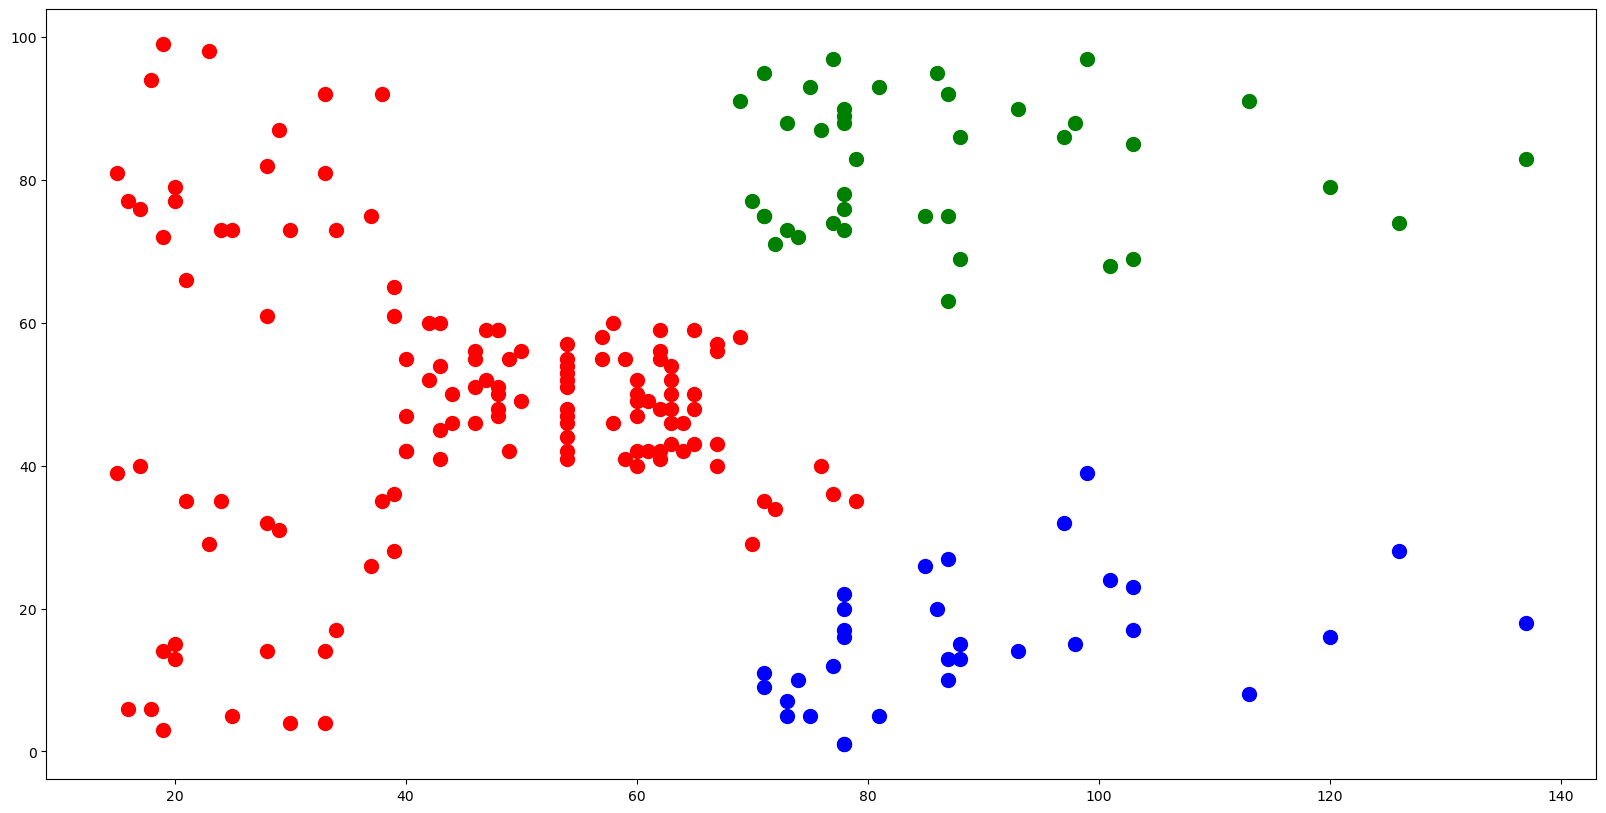

In [64]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc)
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')

Model with 5 Clusters 

1    85
2    39
0    32
4    23
3    21
dtype: int64

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

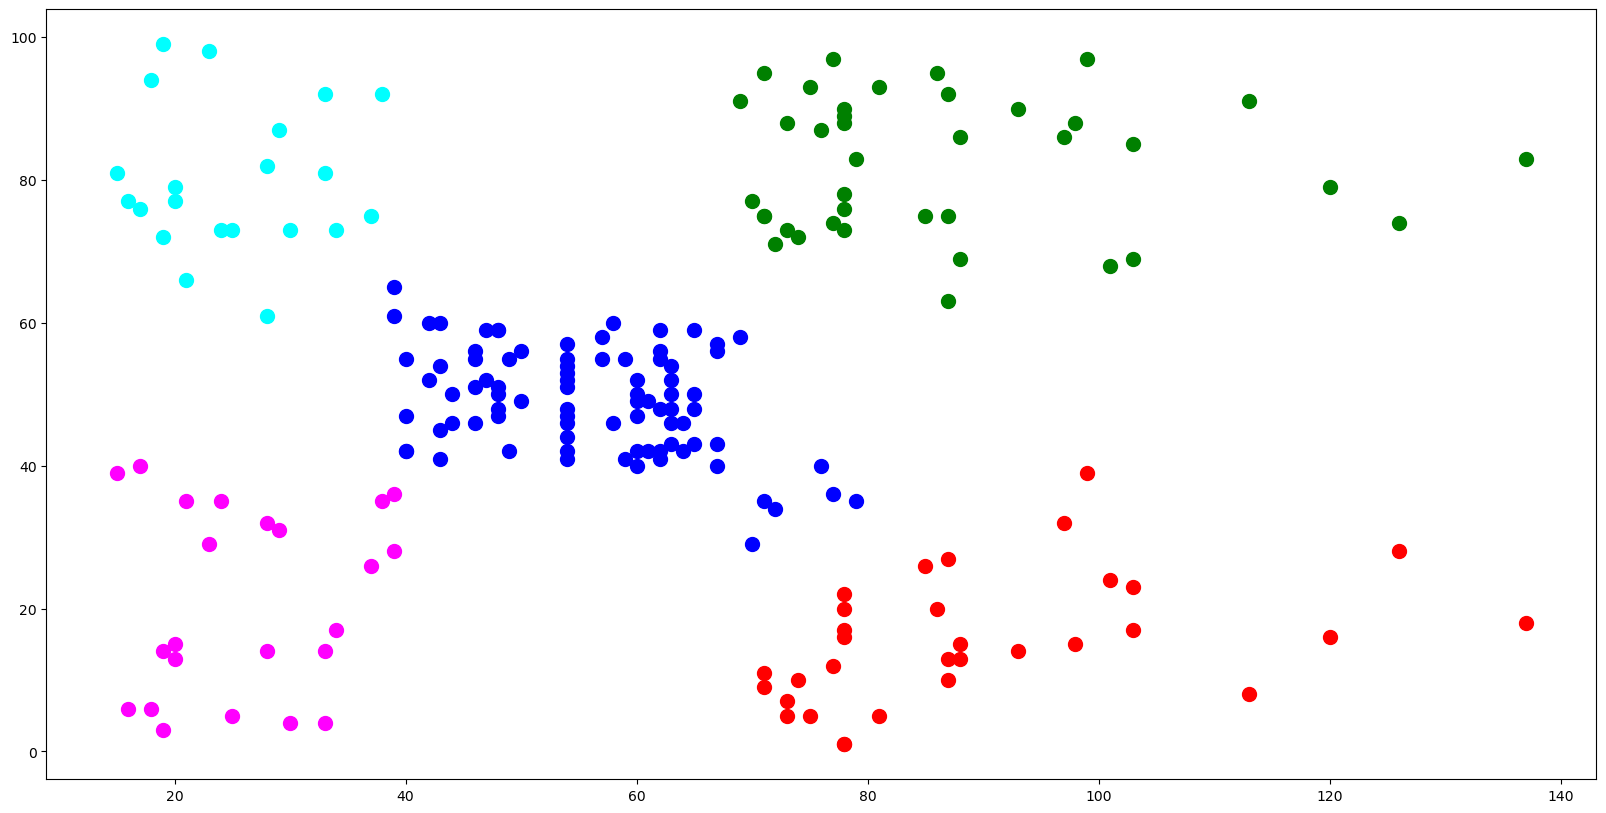

In [65]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc)
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='cyan', label='Cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='magenta', label='Cluster5')

 Model with 10 Clusters 

0    49
7    36
5    23
1    21
3    16
9    14
8    12
4    11
2     9
6     9
dtype: int64

array([4, 1, 8, 1, 4, 1, 8, 1, 8, 1, 8, 1, 8, 1, 8, 1, 4, 1, 4, 1, 4, 1,
       8, 1, 8, 1, 4, 1, 4, 1, 8, 1, 8, 1, 8, 1, 8, 1, 4, 1, 4, 1, 4, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 7, 0, 7, 0, 0, 7, 7, 0, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 3, 0, 9, 5, 3, 5, 3,
       0, 3, 5, 9, 5, 3, 5, 3, 5, 9, 0, 9, 5, 9, 0, 3, 5, 9, 5, 9, 5, 3,
       5, 9, 5, 3, 5, 3, 0, 9, 5, 9, 5, 3, 5, 9, 5, 3, 5, 3, 5, 9, 5, 9,
       5, 3, 5, 2, 6, 2, 5, 2, 6, 2, 6, 3, 6, 2, 6, 3, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int64)

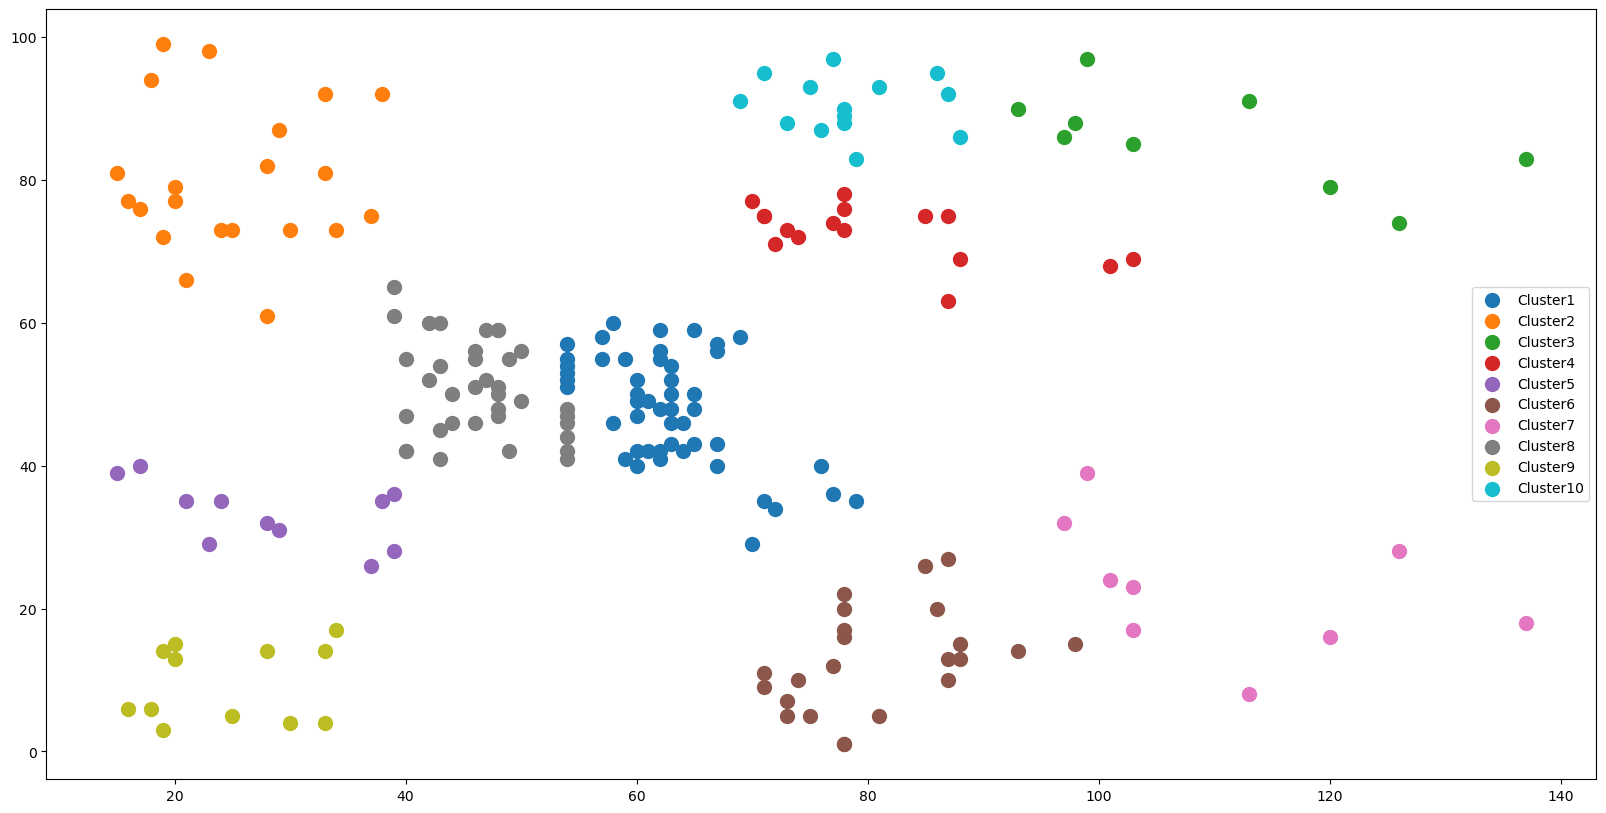

In [66]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc)
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100,  label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100,  label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100,  label='Cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100,  label='Cluster5')
plt.scatter(x[y_hc==5,0], x[y_hc==5,1], s=100,  label='Cluster6')
plt.scatter(x[y_hc==6,0], x[y_hc==6,1], s=100,  label='Cluster7')
plt.scatter(x[y_hc==7,0], x[y_hc==7,1], s=100,  label='Cluster8')
plt.scatter(x[y_hc==8,0], x[y_hc==8,1], s=100,  label='Cluster9')
plt.scatter(x[y_hc==9,0], x[y_hc==9,1], s=100,  label='Cluster10')
plt.legend()
plt.show()

Dendrogram   Method = single

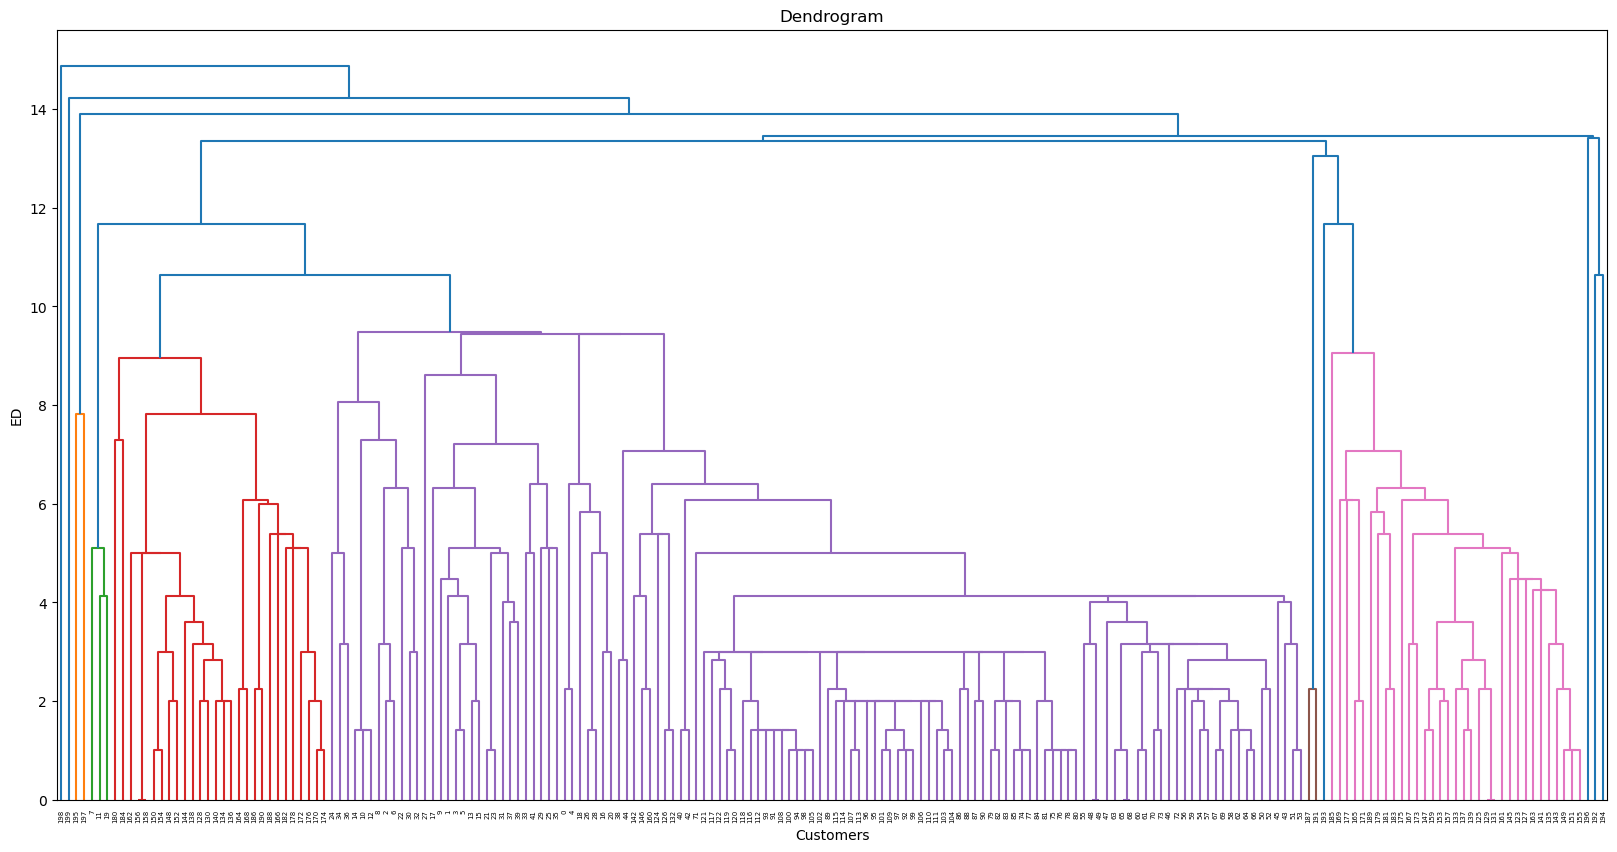

In [67]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(x, method='single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()

A model with two Clusters 

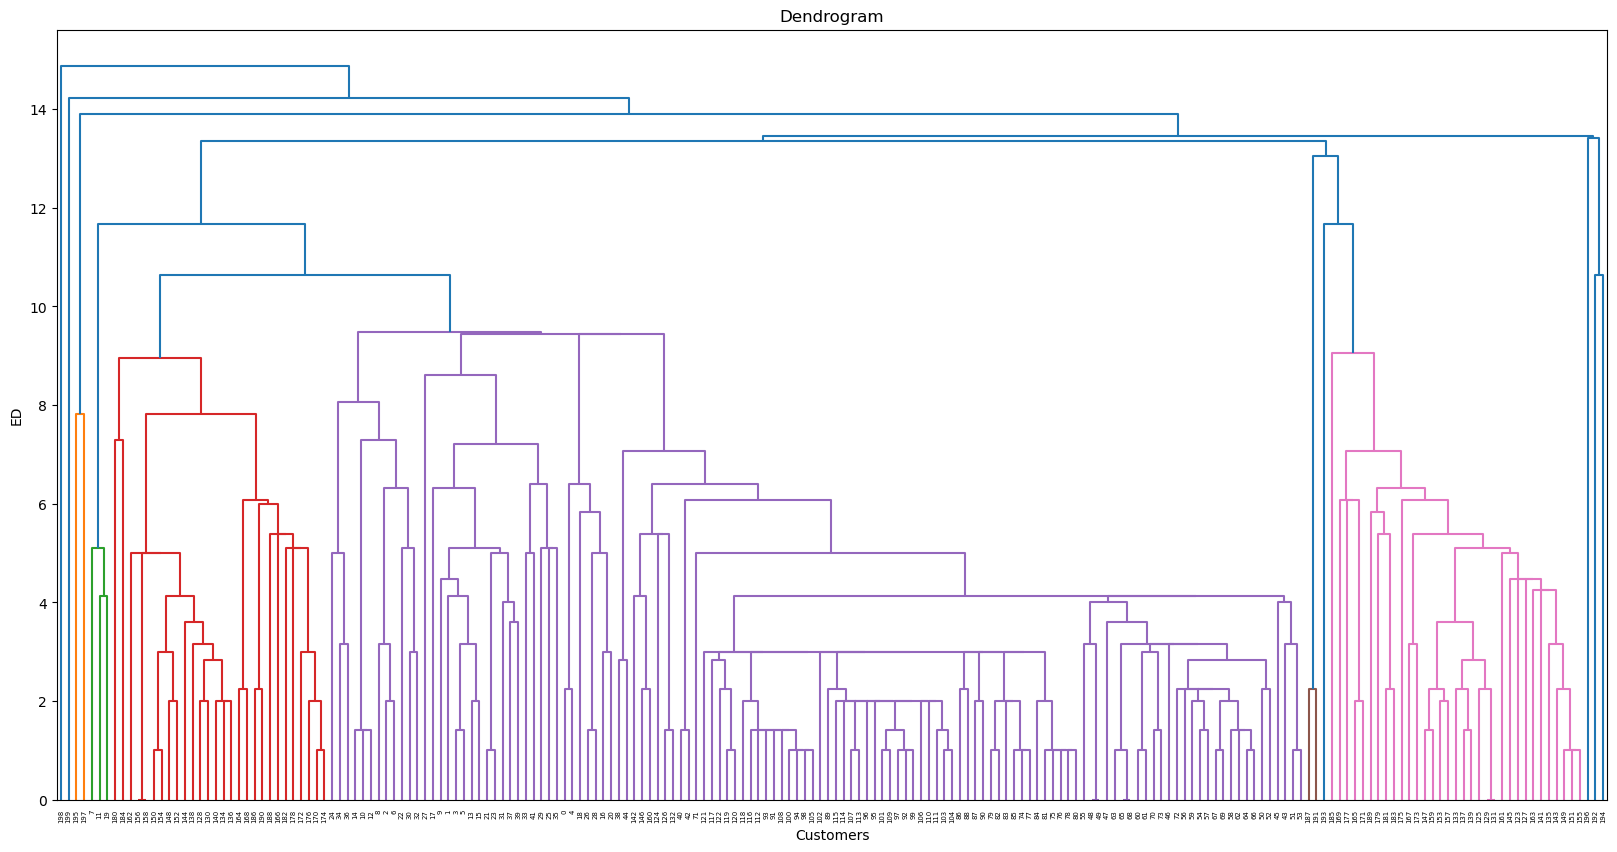

In [68]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(x, method='single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()

A model with three Clusters 

0    198
1      1
2      1
dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2], dtype=int64)

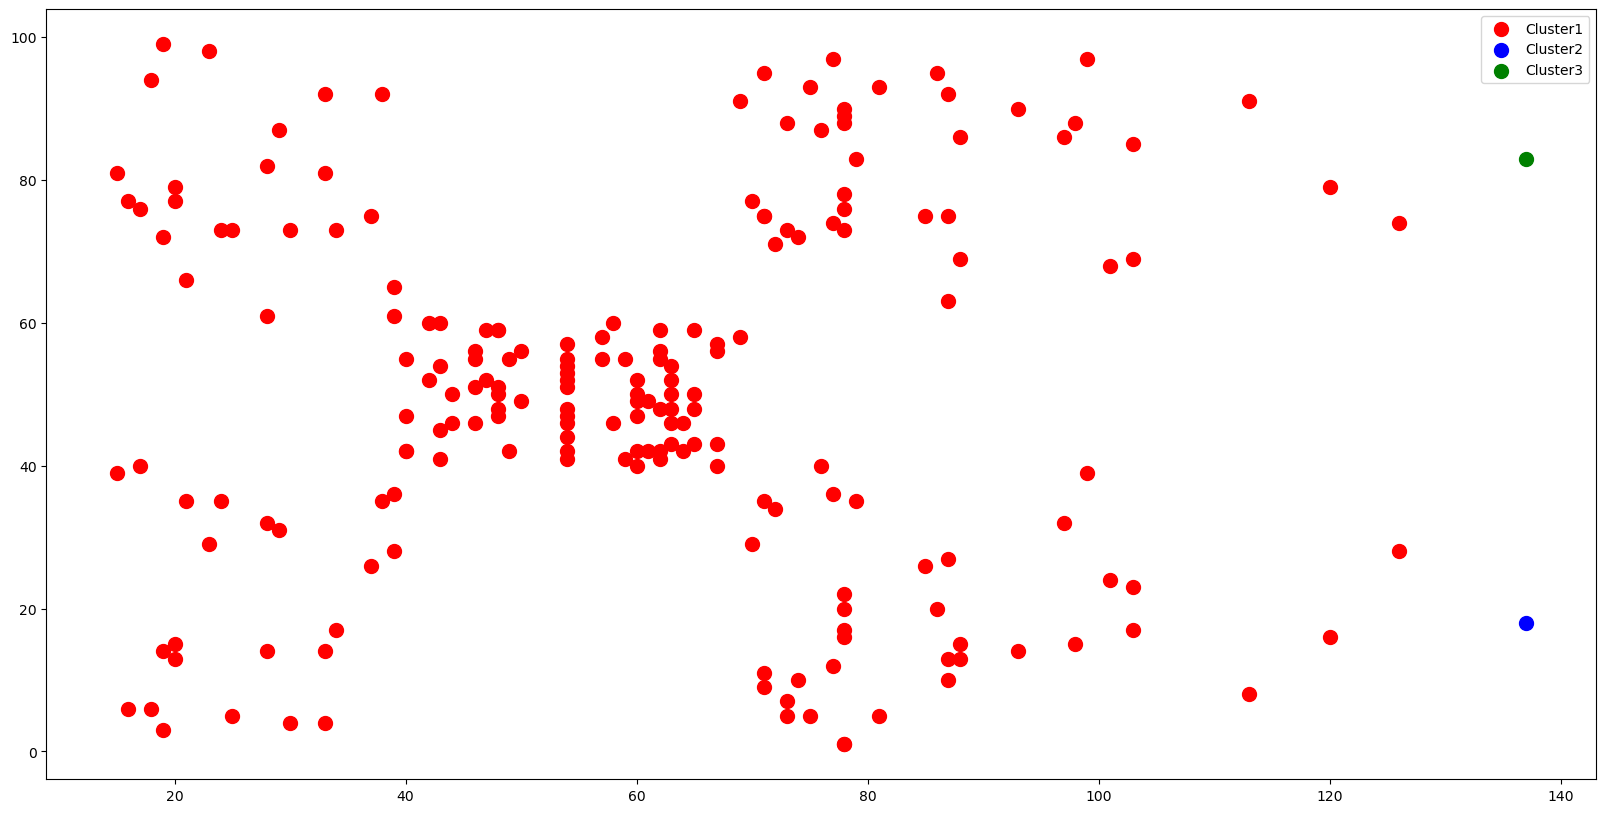

In [69]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.legend()
plt.show()

A model with Four Clusters

0    196
1      2
2      1
3      1
dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       3, 2], dtype=int64)

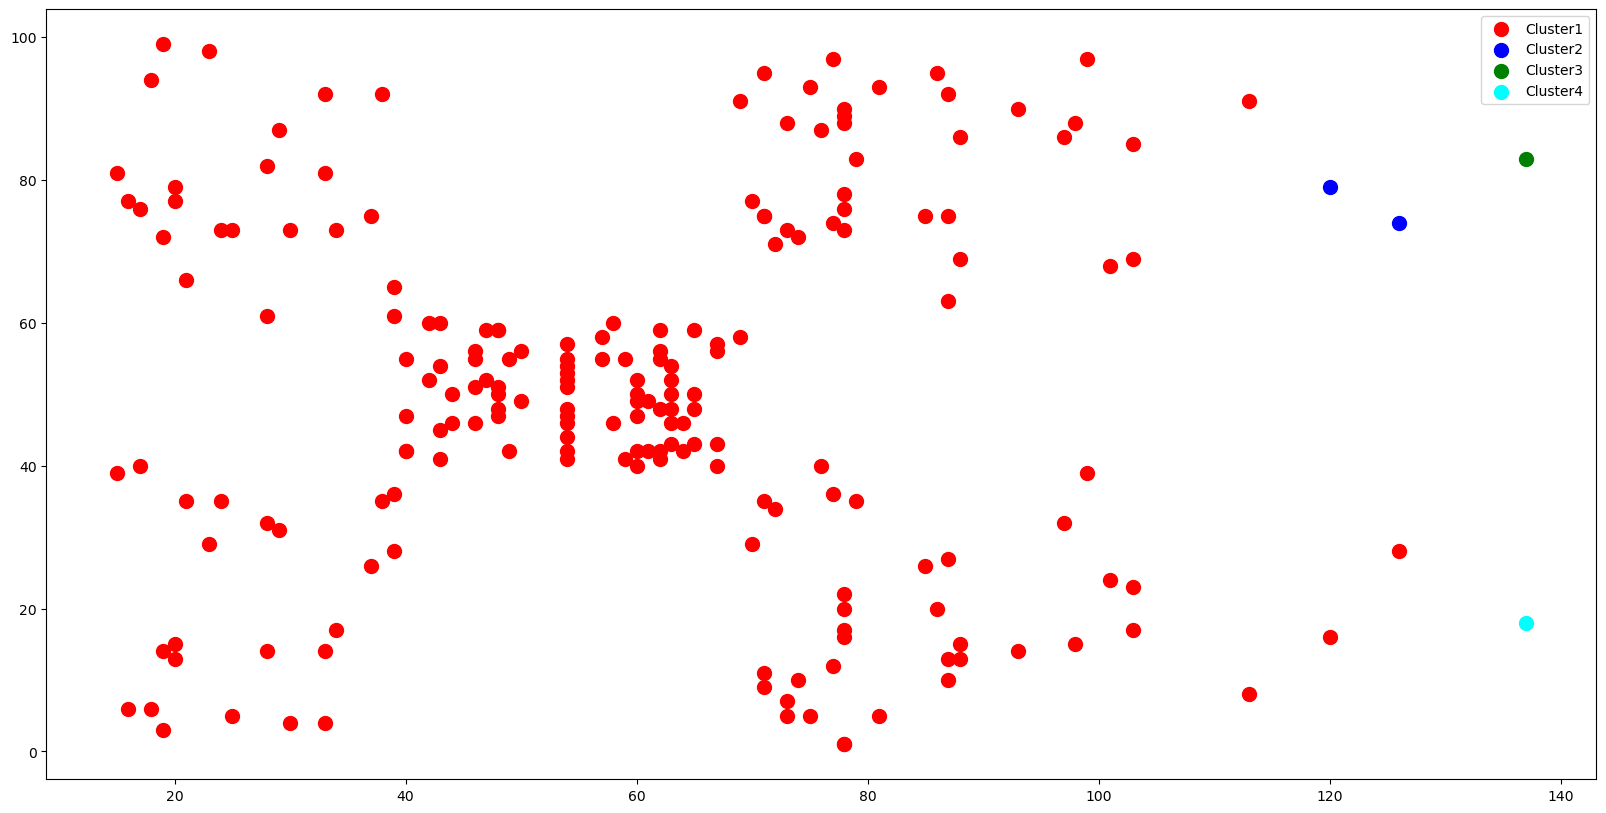

In [70]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='cyan', label='Cluster4')
plt.legend()
plt.show()

A model with Five Clusters 

1    193
0      3
4      2
2      1
3      1
dtype: int64

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 4, 0, 4,
       3, 2], dtype=int64)

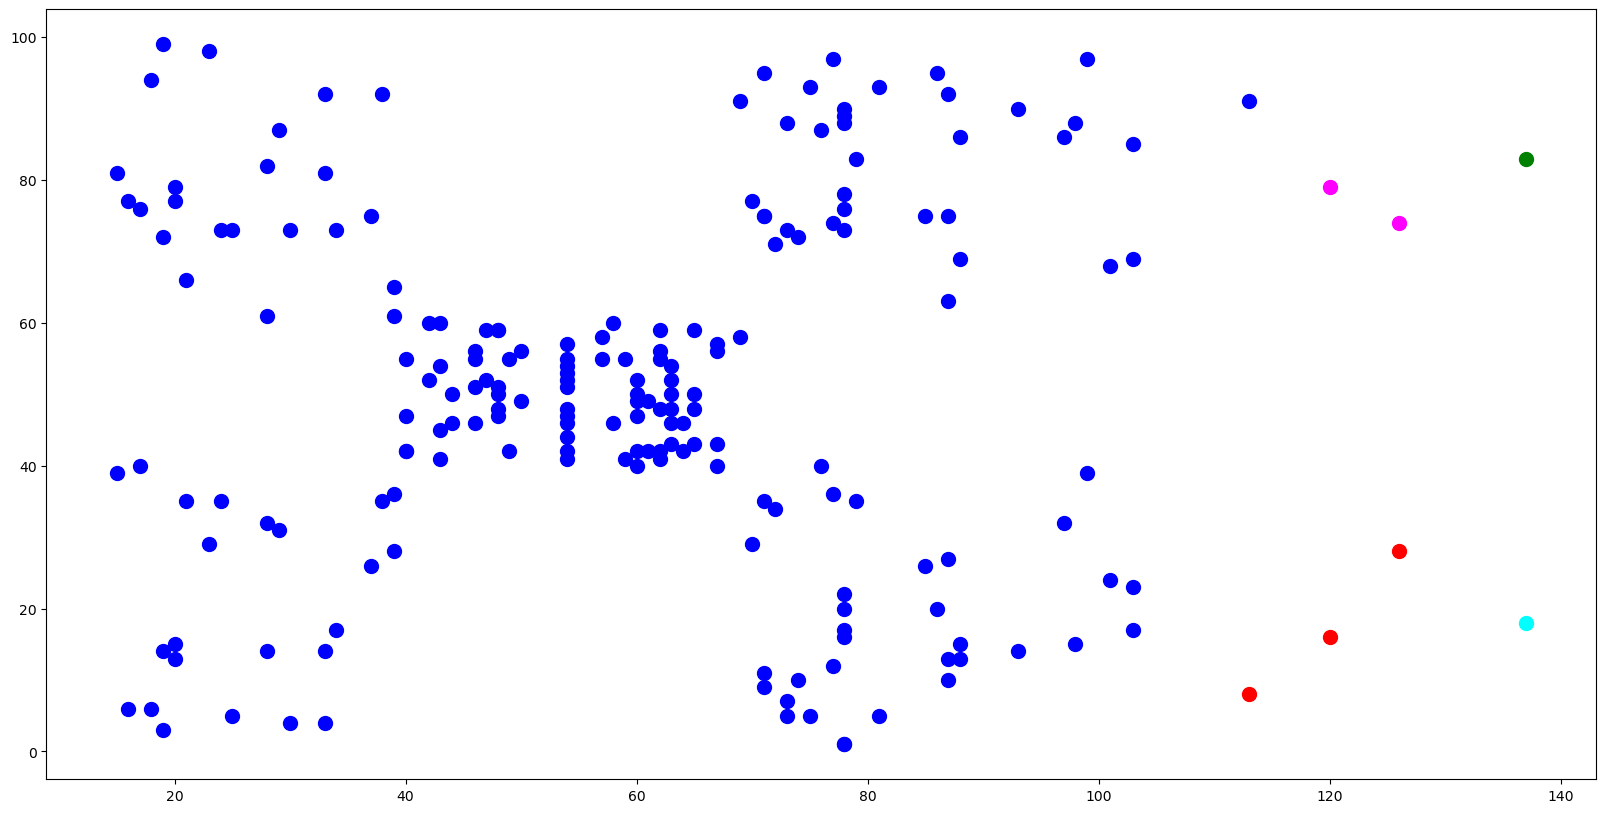

In [76]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc)
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='cyan', label='Cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='magenta', label='Cluster5')
plt.show()


Create Dendrogram   Method = complete

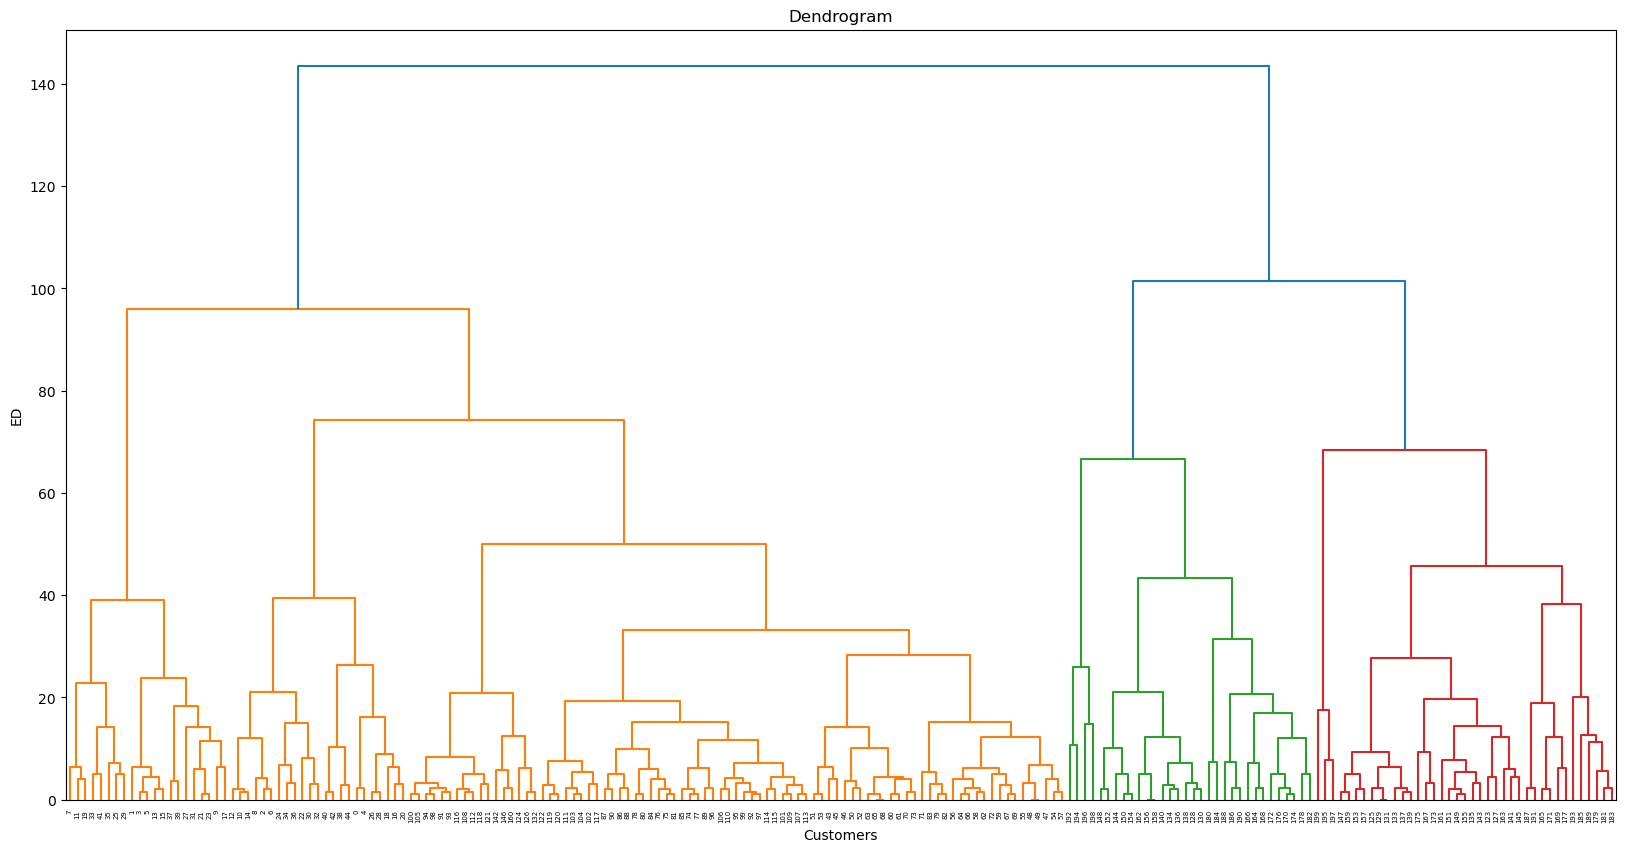

In [77]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()


A model with two Clusters 

1    129
0     71
dtype: int64

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

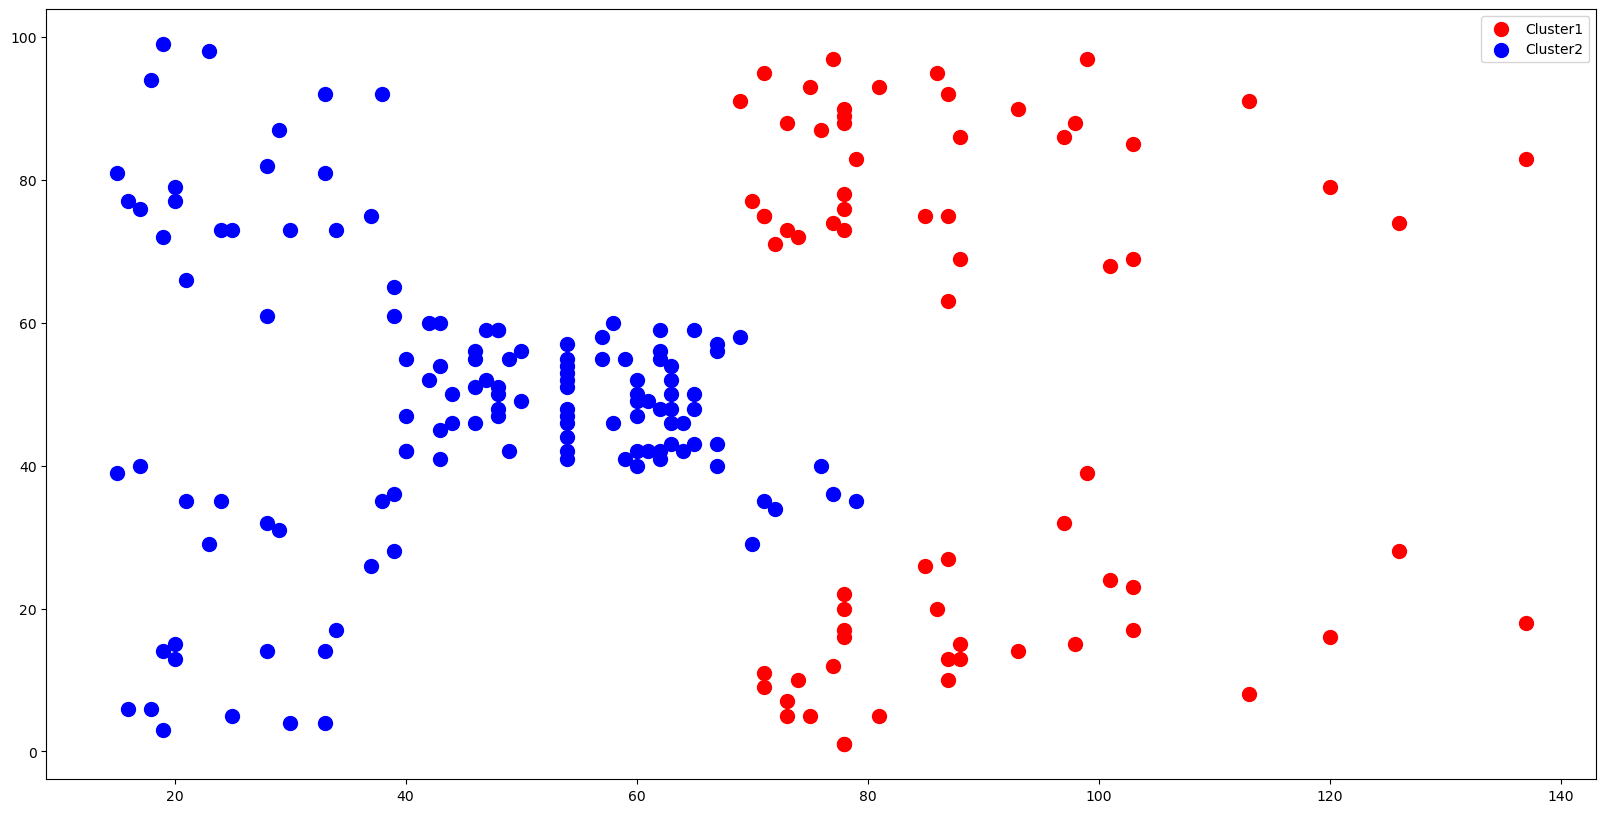

In [78]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.legend()
plt.show()


A model with three Clusters  LINKAGE = 'COMPLETE'

0    129
1     39
2     32
dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

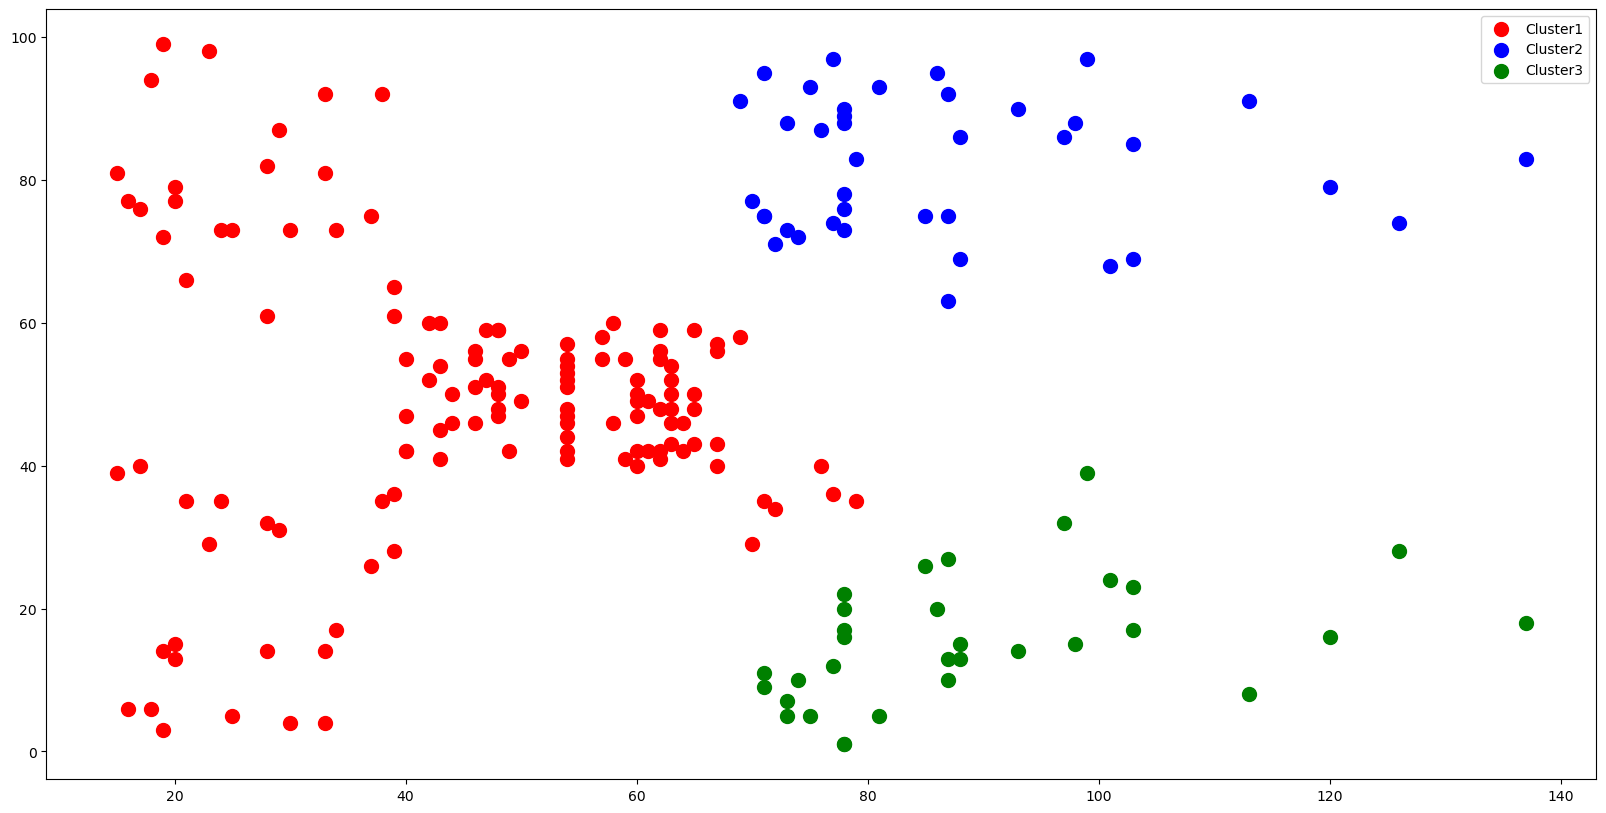

In [79]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.legend()
plt.show()


A model with Four Clusters LINKAGE = 'COMPLETE

0    108
1     39
2     32
3     21
dtype: int64

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

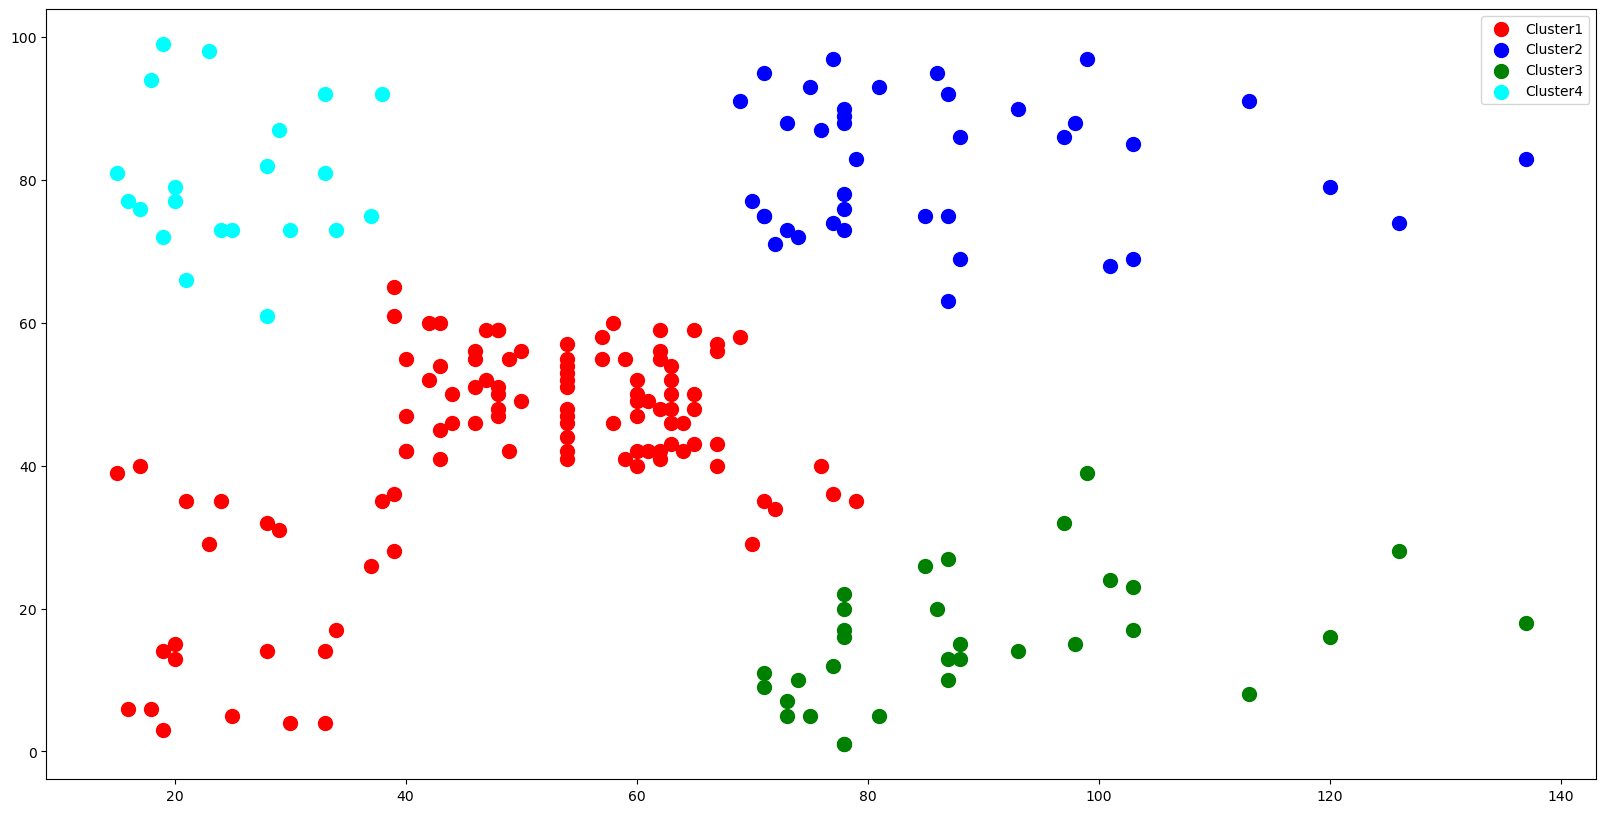

In [80]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='cyan', label='Cluster4')
plt.legend()
plt.show()


A model with Five Clusters LINKAGE = 'COMPLETE

1    85
0    39
2    32
4    23
3    21
dtype: int64

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

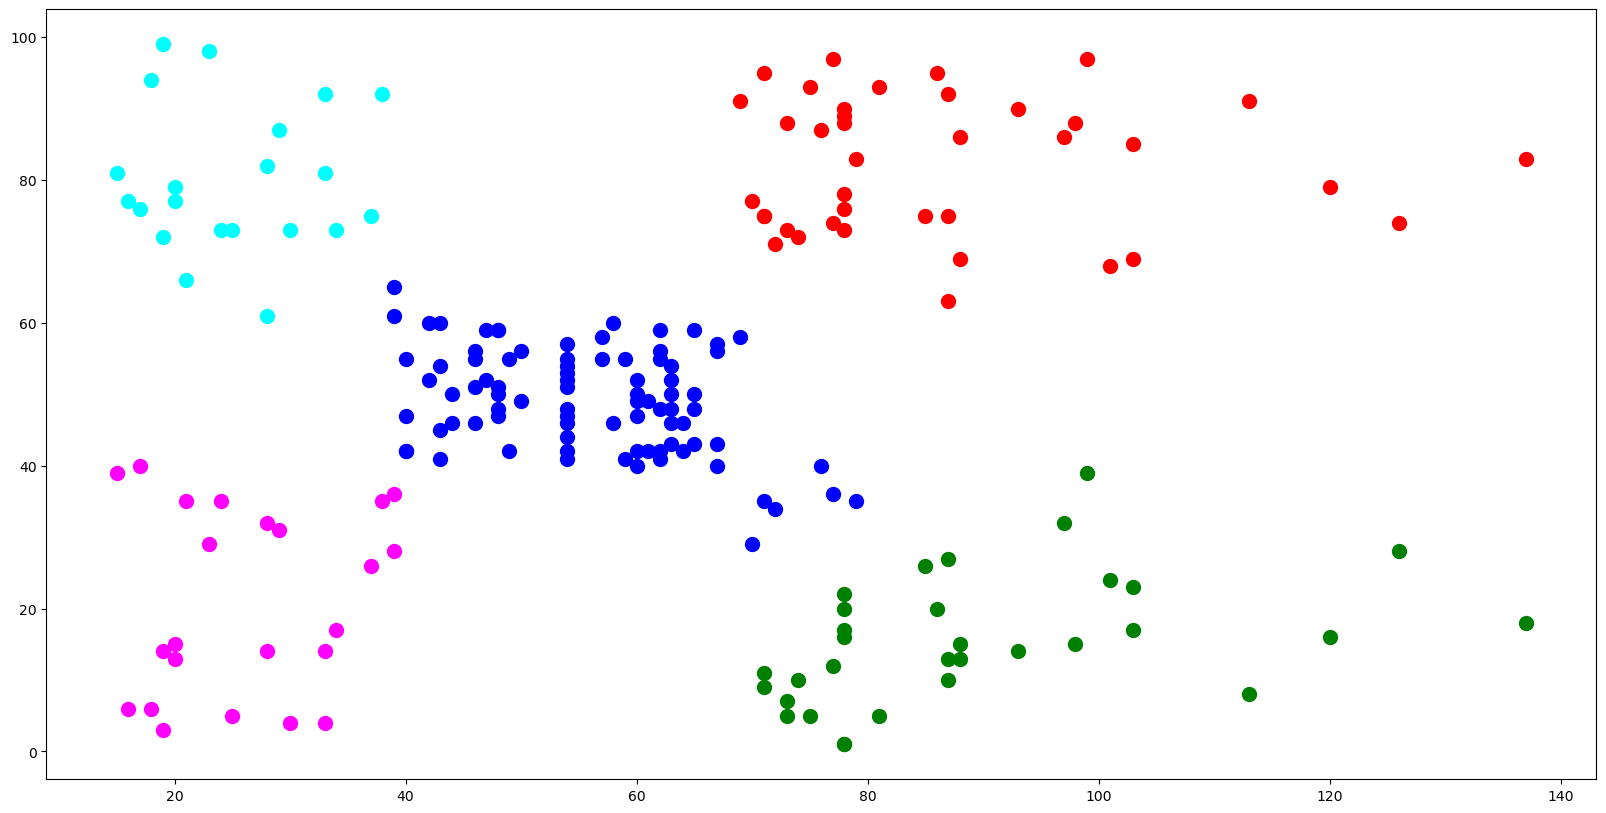

In [81]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc)
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='cyan', label='Cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='magenta', label='Cluster5')
plt.show()


A model with two Clusters LINKAGE - 'AVERAGE'

0    161
1     39
dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

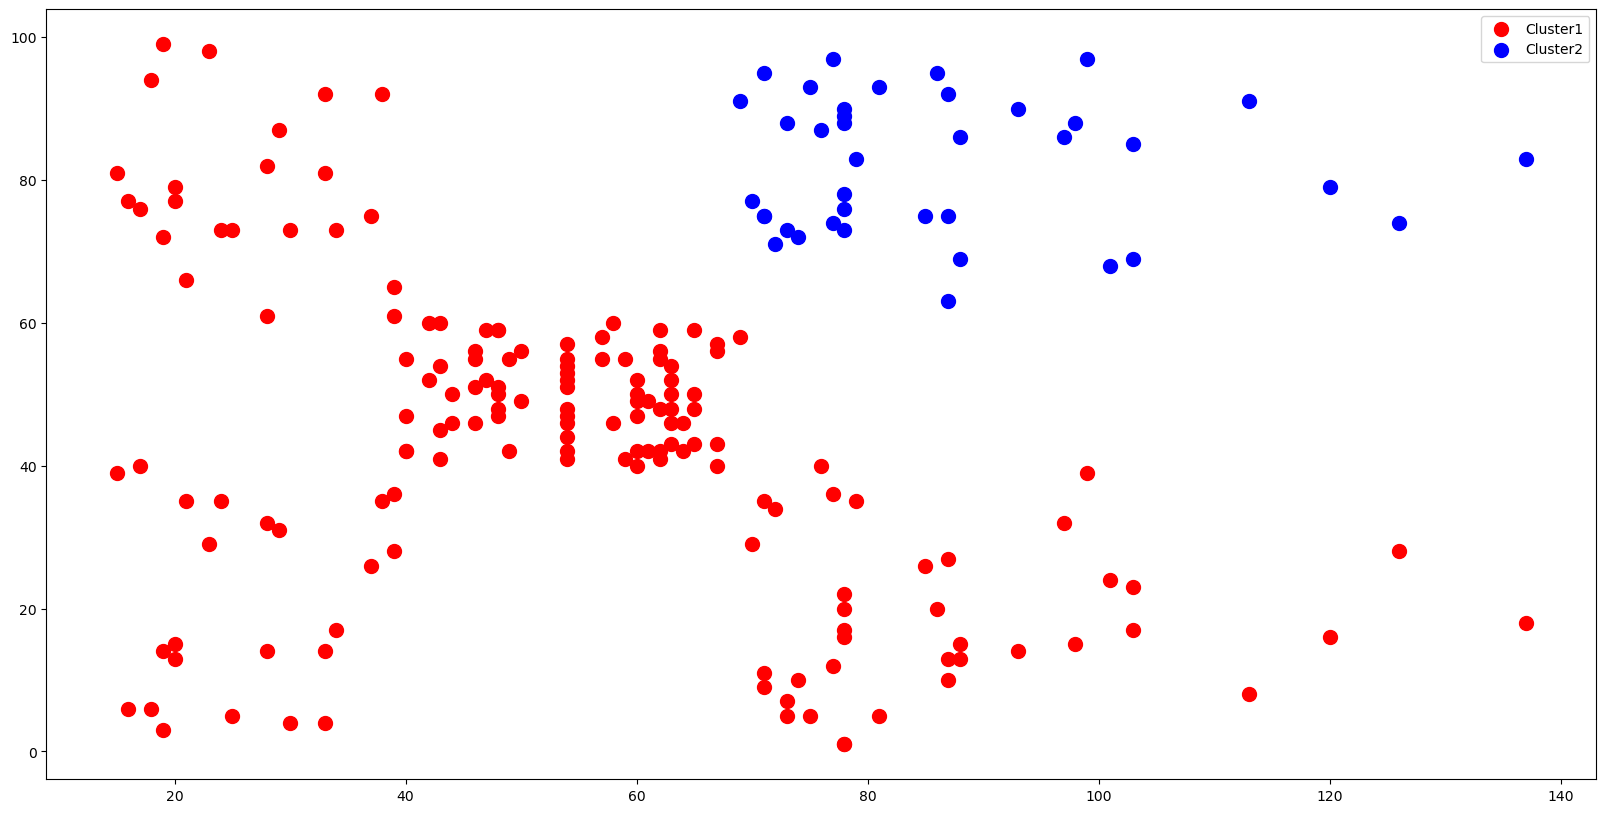

In [82]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.legend()
plt.show()


A model with three Clusters LINKAGE - 'AVERAGE'




0    123
1     39
2     38
dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

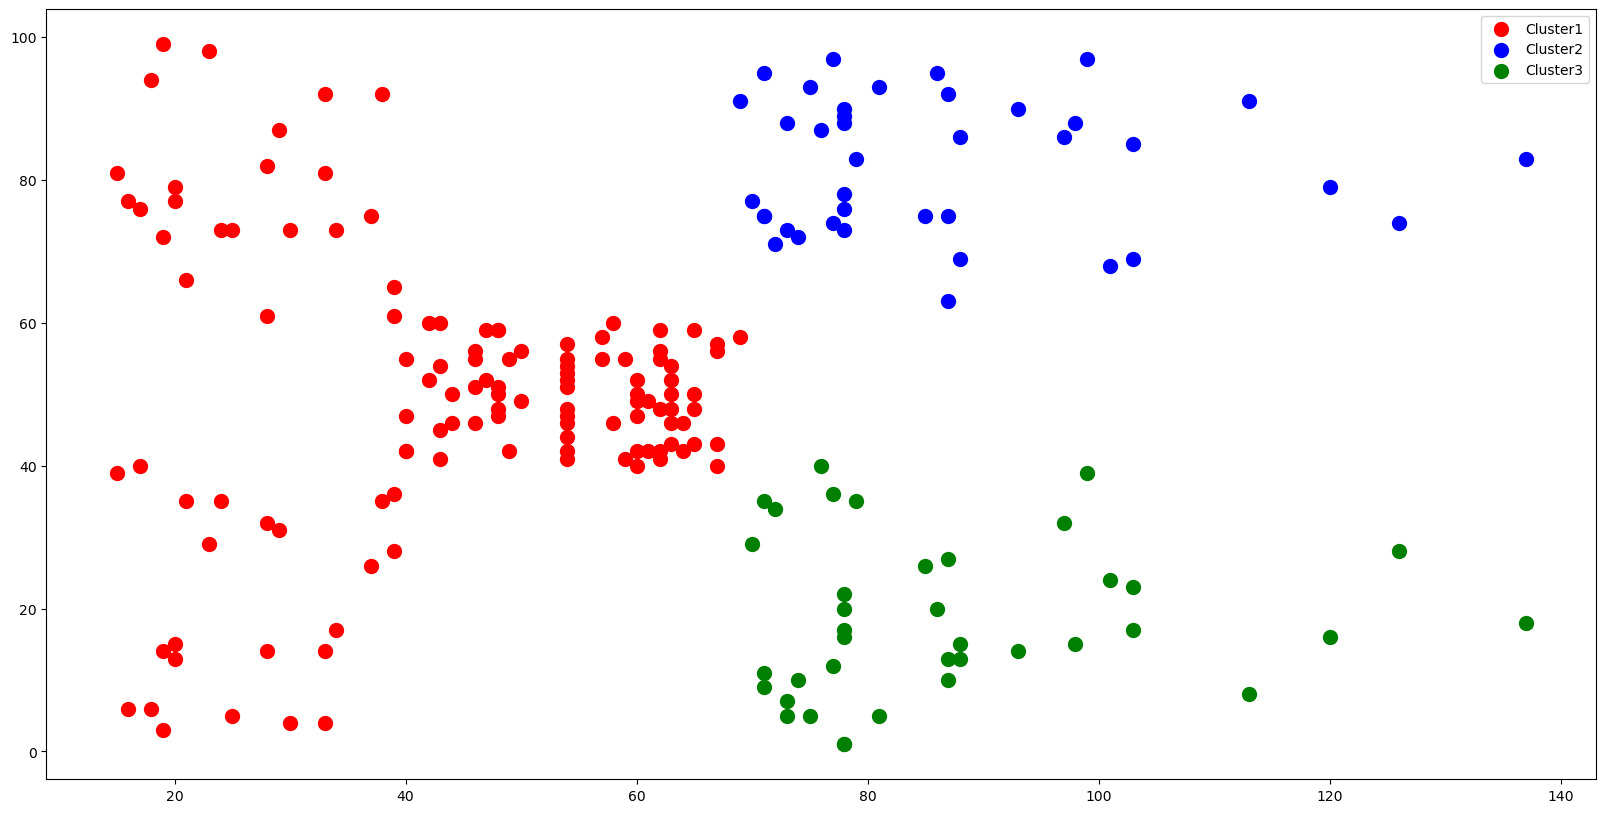

In [83]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.legend()
plt.show()


A model with Four Clusters  LINKAGE - 'AVERAGE'

1    102
0     39
2     38
3     21
dtype: int64

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

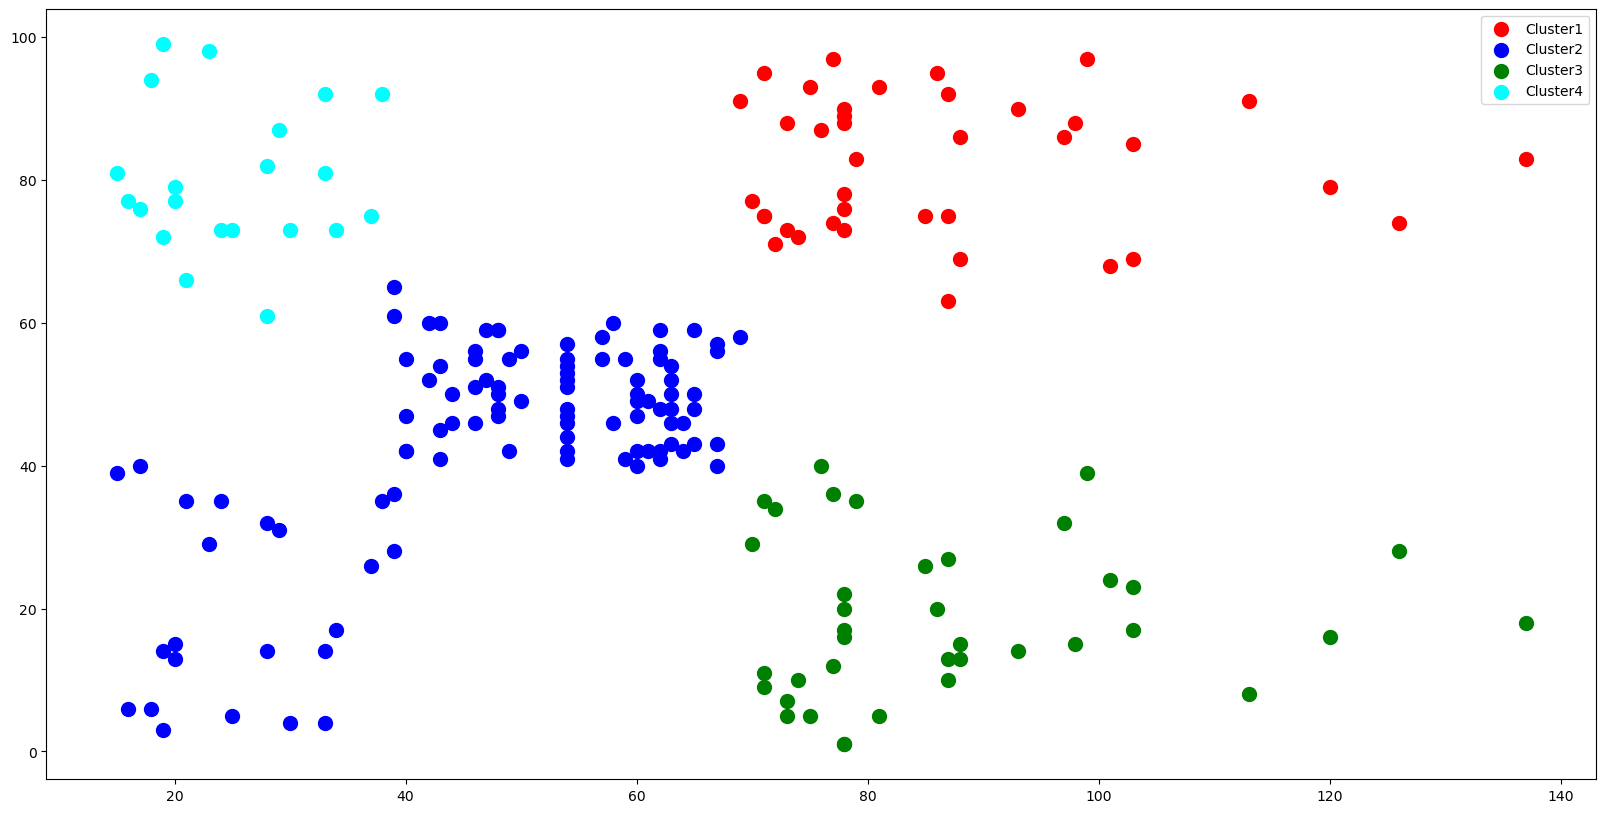

In [87]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc) 
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='cyan', label='Cluster4')
plt.legend()
plt.show()


A model with Five Clusters LINKAGE - 'AVERAGE'

1    102
0     38
2     36
3     21
4      3
dtype: int64

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4], dtype=int64)

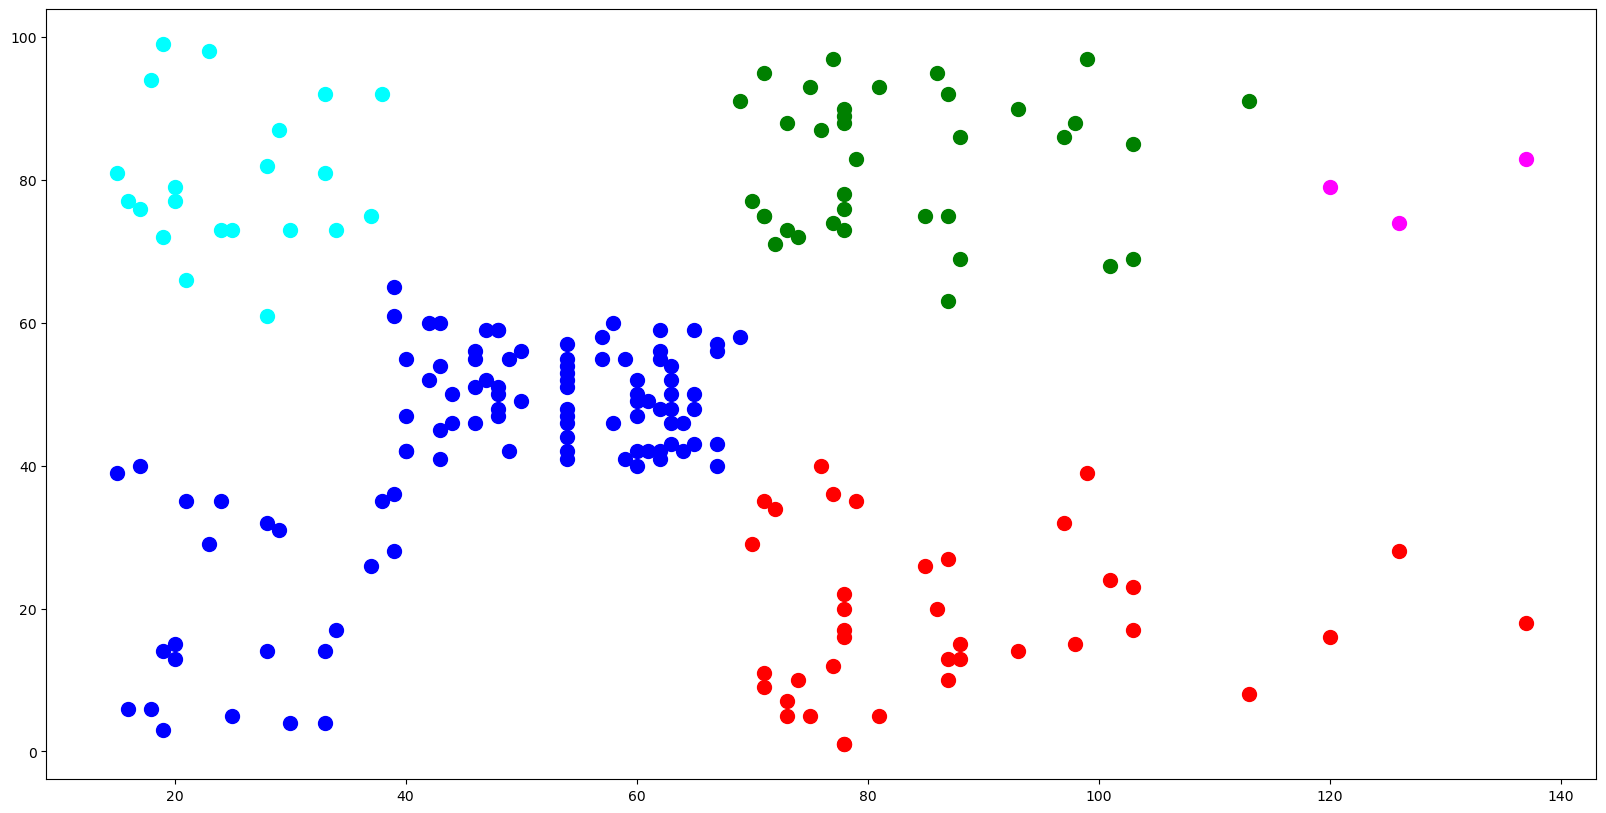

In [88]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage= 'average')
y_hc = hc.fit_predict(x)
display (pd.DataFrame(y_hc).value_counts())
display (y_hc)
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='cyan', label='Cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='magenta', label='Cluster5')
plt.show()

